In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import os

In [2]:
expected_model_version = 1.0
model_path = '../models/spotify_popularity_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [3]:
df = pd.read_csv('../data/df_final.csv')
df=df.drop(columns='Unnamed: 0')

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,decade
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,1921-30
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1921-30
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1921-30
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,1921-30
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,1921-30


In [5]:
bieber = df[df['artists']=='Justin Bieber']

In [6]:
bieber.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,decade
8129,0.0736,Justin Bieber,0.702,195333,0.608,0,0.0,3,0.129,-6.843,1,Available,70,0.0359,75.012,0.597,2020,2011-2020
15143,0.0833,Justin Bieber,0.754,212573,0.650,0,0.0,10,0.177,-6.046,0,Runaway Love,51,0.0316,104.023,0.924,2010,2001-10
15580,0.9070,Justin Bieber,0.558,234787,0.296,0,0.0,10,0.108,-9.180,1,Life Is Worth Living,62,0.0427,76.040,0.463,2015,2011-2020
23207,0.5890,Justin Bieber,0.803,189653,0.356,0,0.0,5,0.160,-9.026,0,Be Alright,58,0.0326,106.950,0.739,2012,2011-2020
30916,0.0840,Justin Bieber,0.711,234933,0.717,0,0.0,0,0.090,-4.317,1,Up,52,0.0396,125.949,0.589,2010,2001-10


In [7]:
bieber.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.336681,0.630610,206368.121951,0.584780,0.0,0.000279,4.634146,0.170961,-6.586488,0.536585,63.975610,0.072229,117.736439,0.555095,2013.853659
std,0.318619,0.118678,32532.013587,0.187226,0.0,0.001265,3.631502,0.091986,2.402528,0.504854,8.693353,0.079014,32.698534,0.210132,3.940565
min,0.001410,0.361000,134347.000000,0.155000,0.0,0.000000,0.000000,0.070300,-14.378000,0.000000,49.000000,0.025900,58.875000,0.078900,2009.000000
25%,0.063100,0.558000,191173.000000,0.443000,0.0,0.000000,1.000000,0.104000,-8.118000,0.000000,57.000000,0.037200,96.976000,0.425000,2010.000000
50%,0.199000,0.654000,203800.000000,0.608000,0.0,0.000000,4.000000,0.129000,-6.204000,1.000000,65.000000,0.043900,114.188000,0.589000,2014.000000
75%,0.589000,0.717000,232720.000000,0.733000,0.0,0.000001,8.000000,0.213000,-4.852000,1.000000,70.000000,0.070000,130.029000,0.728000,2015.000000
max,0.987000,0.845000,264400.000000,0.877000,0.0,0.007830,11.000000,0.437000,-2.528000,1.000000,81.000000,0.438000,191.812000,0.924000,2020.000000


Refit model on all data but bieber

In [8]:
X = df.loc[df.artists != "Justin Bieber", model.X_columns]
y = df.loc[df.artists != "Justin Bieber", 'popularity']

In [9]:
len(X), len(y)

(156567, 156567)

In [10]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', None),
                ('linearregression', LinearRegression())])

In [11]:
cv_results = cross_validate(model, X, y, cv=5, n_jobs=-1)

In [12]:
cv_results['test_score']

array([0.83478941, 0.74646879, 0.5564362 , 0.82785403, 0.90456621])

In [13]:
np.mean(cv_results['test_score'])

0.7740229272390011

In [14]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(-0.7740229272390011, 0.11977905827561484)

In [15]:
X_b = df.loc[df.artists == "Justin Bieber", model.X_columns]
y_b = df.loc[df.artists == "Justin Bieber", 'popularity']


In [16]:
X_b.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
count,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.336681,0.630610,206368.121951,0.584780,0.0,0.000279,4.634146,0.170961,-6.586488,0.536585,0.072229,117.736439,0.555095,2013.853659
std,0.318619,0.118678,32532.013587,0.187226,0.0,0.001265,3.631502,0.091986,2.402528,0.504854,0.079014,32.698534,0.210132,3.940565
min,0.001410,0.361000,134347.000000,0.155000,0.0,0.000000,0.000000,0.070300,-14.378000,0.000000,0.025900,58.875000,0.078900,2009.000000
25%,0.063100,0.558000,191173.000000,0.443000,0.0,0.000000,1.000000,0.104000,-8.118000,0.000000,0.037200,96.976000,0.425000,2010.000000
50%,0.199000,0.654000,203800.000000,0.608000,0.0,0.000000,4.000000,0.129000,-6.204000,1.000000,0.043900,114.188000,0.589000,2014.000000
75%,0.589000,0.717000,232720.000000,0.733000,0.0,0.000001,8.000000,0.213000,-4.852000,1.000000,0.070000,130.029000,0.728000,2015.000000
max,0.987000,0.845000,264400.000000,0.877000,0.0,0.007830,11.000000,0.437000,-2.528000,1.000000,0.438000,191.812000,0.924000,2020.000000


In [17]:
b_pred = model.predict(X_b)

In [18]:
y_b

8129      70
15143     51
15580     62
23207     58
30916     52
31029     53
31893     69
39106     50
39172     60
39682     70
39711     69
46300     49
46547     54
46723     50
54272     62
61473     63
69163     67
75873     57
84328     81
84343     79
84369     77
92215     68
92222     67
92336     68
92345     67
92544     67
100501    65
108944    61
109323    70
109389    70
117297    60
118242    76
126406    80
133214    56
133537    65
140943    60
148776    65
149181    73
155583    54
155627    56
156588    72
Name: popularity, dtype: int64

In [19]:
print(b_pred, y_b)
print(b_pred - y_b)

[63.6496289  57.10727927 56.72247414 57.22222352 57.01244552 57.18116132
 61.23130267 55.83145566 56.2183097  60.53767685 61.48978082 55.32783876
 56.87910988 58.28719432 58.15022029 60.36279832 64.21994537 60.03977505
 54.04871075 59.89938215 59.05840795 56.55077586 53.61598377 55.9984778
 56.73981748 58.77076781 55.88574159 55.53538298 56.69969485 59.66785598
 56.74625711 63.23615164 62.86628575 56.01770599 54.87276507 56.26013824
 59.1610637  62.79828028 53.45061779 56.48035347 60.710886  ] 8129      70
15143     51
15580     62
23207     58
30916     52
31029     53
31893     69
39106     50
39172     60
39682     70
39711     69
46300     49
46547     54
46723     50
54272     62
61473     63
69163     67
75873     57
84328     81
84343     79
84369     77
92215     68
92222     67
92336     68
92345     67
92544     67
100501    65
108944    61
109323    70
109389    70
117297    60
118242    76
126406    80
133214    56
133537    65
140943    60
148776    65
149181    73
155583 

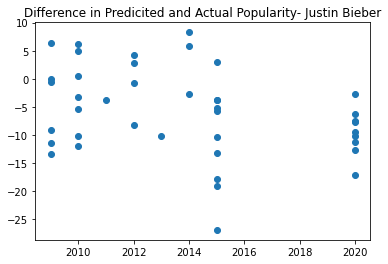

In [20]:

plt.title('Difference in Predicited and Actual Popularity- Justin Bieber')
plt.scatter(X_b['year'], b_pred-y_b)

In [21]:
fm = df[df['artists']=='Fleetwood Mac']
fm

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,decade
2850,0.3990,Fleetwood Mac,0.757,171733,0.484,0,0.000059,5,0.163,-12.382,1,Looking for Somebody,22,0.0952,113.657,0.759,1968,1961-70
2856,0.8390,Fleetwood Mac,0.736,149027,0.221,0,0.019800,0,0.108,-14.633,0,The World Keep on Turning,22,0.0878,132.260,0.702,1968,1961-70
2857,0.3910,Fleetwood Mac,0.439,259773,0.408,0,0.000000,0,0.122,-11.002,1,Merry Go Round - Take 2 Master Version with St...,22,0.0481,162.003,0.394,1968,1961-70
2955,0.1600,Fleetwood Mac,0.466,204439,0.623,0,0.063800,4,0.155,-10.474,0,Oh Well (Pt. 1) - 2013 Remaster,30,0.1570,102.285,0.235,1969,1961-70
3587,0.0100,Fleetwood Mac,0.648,258440,0.596,0,0.029300,9,0.142,-11.444,1,Say You Love Me - Early Version,30,0.0272,128.207,0.848,1975,1971-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153270,0.0092,Fleetwood Mac,0.644,333804,0.654,0,0.002900,5,0.136,-9.238,1,Gypsy - Early Version; 2016 Remaster,32,0.0260,128.712,0.731,1982,1981-90
154544,0.8760,Fleetwood Mac,0.469,186160,0.621,0,0.024600,1,0.712,-9.828,0,Big Love - Live at Warner Brothers Studios in ...,46,0.0313,138.931,0.683,1997,1991-00
154563,0.2190,Fleetwood Mac,0.528,408373,0.635,0,0.000320,9,0.815,-9.716,0,Rhiannon - Live at Warner Brothers Studios in ...,42,0.0457,125.951,0.325,1997,1991-00
154942,0.1160,Fleetwood Mac,0.828,255640,0.447,0,0.013000,0,0.166,-10.437,1,Dreams - 2002 Remaster,42,0.0317,120.377,0.741,2002,2001-10


In [22]:
X = df.loc[df.artists != "Fleetwood Mac", model.X_columns]
y = df.loc[df.artists != "Fleetwood Mac", 'popularity']

In [23]:
len(X), len(y)

(156304, 156304)

In [24]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', None),
                ('linearregression', LinearRegression())])

In [25]:
cv_results = cross_validate(model, X, y, cv=5, n_jobs=-1)

In [26]:
cv_results['test_score']

array([0.83503786, 0.74733976, 0.55775828, 0.82776584, 0.90462835])

In [27]:
np.mean(cv_results['test_score'])

0.774506019162584

In [28]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(-0.774506019162584, 0.11928966552066957)

In [29]:
X_fm = df.loc[df.artists == "Fleetwood Mac", model.X_columns]
y_fm = df.loc[df.artists == "Fleetwood Mac", 'popularity']

In [30]:
fm_pred = model.predict(X_fm)

In [31]:
X_fm

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
2850,0.3990,0.757,171733,0.484,0,0.000059,5,0.163,-12.382,1,0.0952,113.657,0.759,1968
2856,0.8390,0.736,149027,0.221,0,0.019800,0,0.108,-14.633,0,0.0878,132.260,0.702,1968
2857,0.3910,0.439,259773,0.408,0,0.000000,0,0.122,-11.002,1,0.0481,162.003,0.394,1968
2955,0.1600,0.466,204439,0.623,0,0.063800,4,0.155,-10.474,0,0.1570,102.285,0.235,1969
3587,0.0100,0.648,258440,0.596,0,0.029300,9,0.142,-11.444,1,0.0272,128.207,0.848,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153270,0.0092,0.644,333804,0.654,0,0.002900,5,0.136,-9.238,1,0.0260,128.712,0.731,1982
154544,0.8760,0.469,186160,0.621,0,0.024600,1,0.712,-9.828,0,0.0313,138.931,0.683,1997
154563,0.2190,0.528,408373,0.635,0,0.000320,9,0.815,-9.716,0,0.0457,125.951,0.325,1997
154942,0.1160,0.828,255640,0.447,0,0.013000,0,0.166,-10.437,1,0.0317,120.377,0.741,2002


In [32]:
y_fm

2850      22
2856      22
2857      22
2955      30
3587      30
          ..
153270    32
154544    46
154563    42
154942    42
155097    45
Name: popularity, Length: 304, dtype: int64

In [33]:
print(fm_pred - y_fm)

2850      4.377417
2856      3.458498
2857      3.909934
2955     -3.580727
3587      2.541110
            ...   
153270    5.512364
154544   -3.203514
154563    3.272966
154942    9.828002
155097    5.426029
Name: popularity, Length: 304, dtype: float64


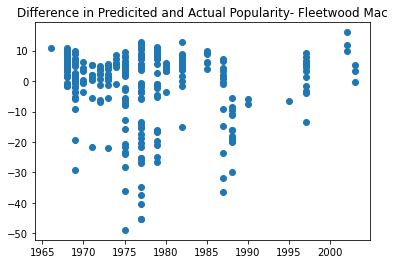

In [34]:
plt.title('Difference in Predicited and Actual Popularity- Fleetwood Mac')
plt.scatter(X_fm['year'],fm_pred-y_fm)